In [199]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

# Loading and preprocessing data

In [200]:
data = pd.read_csv('data/dataset.csv')
features = data[['value', 'predicted']].to_numpy()
labels = data['is_anomaly'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
X_train = torch.tensor(X_train[y_train == False], dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Visualizing the data

In [201]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

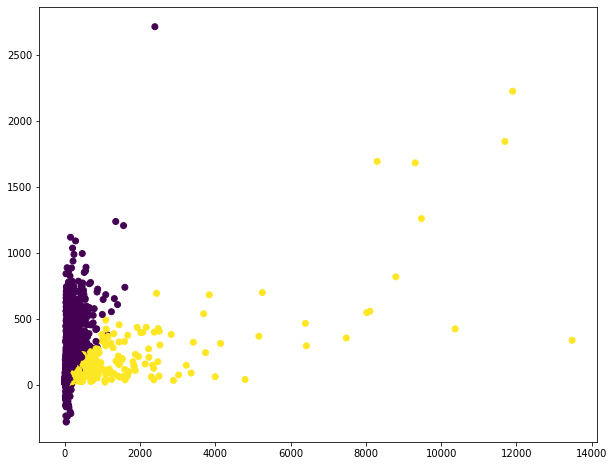

In [202]:
plot_datapoints(features, labels)

# Building and training a model

In [203]:
class AutoencoderAnomaly(nn.Module):
    def __init__(self):
        super(AutoencoderAnomaly, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2, 2**2),
            nn.ReLU(),
            nn.Linear(2**2, 2**3),
            nn.ReLU(),
            nn.Linear(2**3, 2**4)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2**4, 2**3),
            nn.ReLU(),
            nn.Linear(2**3, 2**2),
            nn.ReLU(),
            nn.Linear(2**2, 2)
        )
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        X = self.encoder(X)
        return self.decoder(X)

In [204]:
model = AutoencoderAnomaly()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [205]:
for epoch in range(800):
    pred = model(X_train)
    loss = criterion(torch.sigmoid(pred), torch.sigmoid(X_train))

    print(f'{epoch}) Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0) Loss: 0.6954472064971924
1) Loss: 0.6801150441169739
2) Loss: 0.6633997559547424
3) Loss: 0.6459557414054871
4) Loss: 0.6298569440841675
5) Loss: 0.6127107739448547
6) Loss: 0.594252347946167
7) Loss: 0.5740627646446228
8) Loss: 0.5520187616348267
9) Loss: 0.5277388691902161
10) Loss: 0.5008137226104736
11) Loss: 0.4709533452987671
12) Loss: 0.4378593862056732
13) Loss: 0.40141457319259644
14) Loss: 0.3618893623352051
15) Loss: 0.3193937838077545
16) Loss: 0.2739412188529968
17) Loss: 0.22803108394145966
18) Loss: 0.18336638808250427
19) Loss: 0.14237795770168304
20) Loss: 0.10682465136051178
21) Loss: 0.07774466276168823
22) Loss: 0.05591423436999321
23) Loss: 0.04395437240600586
24) Loss: 0.04242566227912903
25) Loss: 0.04839443787932396
26) Loss: 0.05547231808304787
27) Loss: 0.05292387306690216
28) Loss: 0.05488956347107887
29) Loss: 0.05398270860314369
30) Loss: 0.053718842566013336
31) Loss: 0.053556859493255615
32) Loss: 0.053478896617889404
33) Loss: 0.053482361137866974
34)

In [216]:
loss = np.array([])
with torch.inference_mode():
    for x in X_test:
        pred = model(X_test)
        loss = np.append(loss, criterion(torch.sigmoid(pred), torch.sigmoid(X_test)).detach())

In [218]:
loss[y_test], loss

(array([0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05651613, 0.05651613,
        0.05651613, 0.05651613, 0.05651613, 0.05